In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [2]:
#read jsonl file
df = pd.read_json('./data/metadata.jsonl', lines=True)
df.head()

file_name        text_prompt
0  train/sample_0.png  Low masking level
1  train/sample_1.png  Low masking level
2  train/sample_2.png  Low masking level
3  train/sample_3.png  Low masking level
4  train/sample_4.png  Low masking level

In [3]:
#convert text prompt to 0,1,2 instead of Low, Medium, High respectively
df['text_prompt'] = df['text_prompt'].map({'Low masking level': 0, 'Medium masking level': 1, 'High masking level': 2})

df.head()

file_name  text_prompt
0  train/sample_0.png            0
1  train/sample_1.png            0
2  train/sample_2.png            0
3  train/sample_3.png            0
4  train/sample_4.png            0

In [4]:
#what is the distribution of the data
df['text_prompt'].value_counts()

text_prompt
0    33333
1    33333
2    33333
Name: count, dtype: int64

In [5]:
labels = []
#read labels from jsonl file
for i in range(99999):
    labels.append(df['text_prompt'][i])

print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [6]:
#load png files

processed_folder = './data/processed/'
num_required_images = 99999

#check if the processed folder exists and has enough images
if os.path.exists(processed_folder) and len(os.listdir(processed_folder)) >= num_required_images:
    print('Processed folder exists and has enough images')
    images = []
    for i in range(num_required_images):
        print("Loading image", i)
        img = Image.open(os.path.join(processed_folder, 'sample_' + str(i) + '.png'))
        img = img.convert('L')
        img_array = np.array(img)
        images.append(img_array)
else:
    #process and save images
    print('Processing and saving images')
    images = []
    original_folder = './data/train/' 
    for i in range(num_required_images):
        print("Processing image", i)
        filename = 'sample_' + str(i) + '.png'

        #create the processed folder if it doesn't exist
        if not os.path.exists(processed_folder):
            os.makedirs(processed_folder)

        #process the image
        img = Image.open(os.path.join(original_folder, filename))
        img = img.resize((128, 160))
        img = img.convert('L')
        img_array = np.array(img)

        #save the processed image
        img.save(os.path.join(processed_folder, filename)) 

        images.append(img_array)

Processed folder exists and has enough images
Loading image 0
Loading image 1
Loading image 2
Loading image 3
Loading image 4
Loading image 5
Loading image 6
Loading image 7
Loading image 8
Loading image 9
Loading image 10
Loading image 11
Loading image 12
Loading image 13
Loading image 14
Loading image 15
Loading image 16
Loading image 17
Loading image 18
Loading image 19
Loading image 20
Loading image 21
Loading image 22
Loading image 23
Loading image 24
Loading image 25
Loading image 26
Loading image 27
Loading image 28
Loading image 29
Loading image 30
Loading image 31
Loading image 32
Loading image 33
Loading image 34
Loading image 35
Loading image 36
Loading image 37
Loading image 38
Loading image 39
Loading image 40
Loading image 41
Loading image 42
Loading image 43
Loading image 44
Loading image 45
Loading image 46
Loading image 47
Loading image 48
Loading image 49
Loading image 50
Loading image 51
Loading image 52
Loading image 53
Loading image 54
Loading image 55
Loading imag

(160, 128)


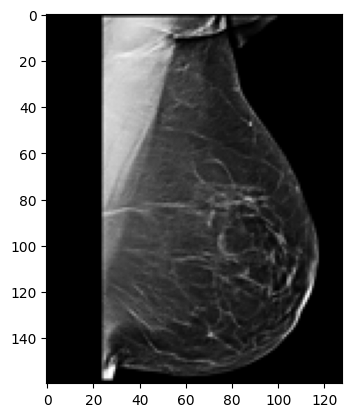

In [7]:
print(images[0].shape)
#are the images loaded correctly?
plt.imshow(images[0], cmap='gray')

Create and train the baseline model

In [8]:
#if modelV1.h5 exists, load it
try:
    modelV1 = keras.models.load_model('./models/modelV1.h5')
    print('Model loaded')
    print(modelV1.summary())
    print(modelV1.history)
    V1Created = True
except:
    V1Created = False
    print('Model not found')

Model not found


In [9]:
if not V1Created:
    inputs = keras.Input(shape=(160,128,1)) #resolution of images
    x = layers.Conv2D(16, 3, activation="relu")(inputs)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(3, activation="softmax")(x) #3 classes
    modelV1 = keras.Model(inputs=inputs, outputs=outputs)


2024-02-24 16:42:32.235705: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-24 16:42:32.236018: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-02-24 16:42:32.236029: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-02-24 16:42:32.236469: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-24 16:42:32.237288: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
modelV1.summary()
print(modelV1.history)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 158, 126, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 79, 63, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 79632)             0         
                                                                 
 dense (Dense)               (None, 3)                 238899    
                                                                 
Total params: 239059 (933.82 KB)
Trainable params: 239059 (933.82 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [11]:
#initial split of the data 80% train, 20% test
X_train_temp, X_test, y_train_temp, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

#further split the training data into 75% train, 25% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

In [12]:
#compile model if not loaded
if not V1Created:
    modelV1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [13]:
#train model if not loaded
if not V1Created:
    modelV1.fit(np.array(X_train), np.array(y_train), epochs=3, batch_size=32, validation_data=(np.array(X_val), np.array(y_val)))


Epoch 1/3


2024-02-24 16:42:38.548485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 3.6391 - accuracy: 0.9659

2024-02-24 16:44:10.879716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 101s 53ms/step - loss: 3.6391 - accuracy: 0.9659 - val_loss: 0.3500 - val_accuracy: 0.9762
Epoch 2/3
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1304 - accuracy: 0.9873 - val_loss: 0.1564 - val_accuracy: 0.9839
Epoch 3/3
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0950 - accuracy: 0.9876 - val_loss: 0.1792 - val_accuracy: 0.9797


In [14]:
#save model if not loaded
if not V1Created:
    modelV1.save('./models/modelV1.h5')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
#show graph of training loss and validation loss

def plot_loss_accuracy(modelCreated, model, modelName):
    if not modelCreated:
        history_dict = model.history.history
        loss_values = history_dict["loss"]
        val_loss_values = history_dict["val_loss"]
        epochs = range(1, len(loss_values) + 1)
        plt.plot(epochs, loss_values, "bo", label="Training loss")
        plt.plot(epochs, val_loss_values, "b", label="Validation loss")
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend()
        plt.savefig('./models/' + modelName + '_loss.png')
        plt.show()
        
        plt.clf()
        plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
        plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend()
        plt.savefig('./models/' + modelName + '_accuracy.png')
        plt.show()
        
    else:
        img = Image.open('./models/' + modelName + '_loss.png')
        plt.axis('off')
        plt.imshow(img)
        img = Image.open('./models/' + modelName + '_accuracy.png')
        plt.axis('off')
        plt.imshow(img)

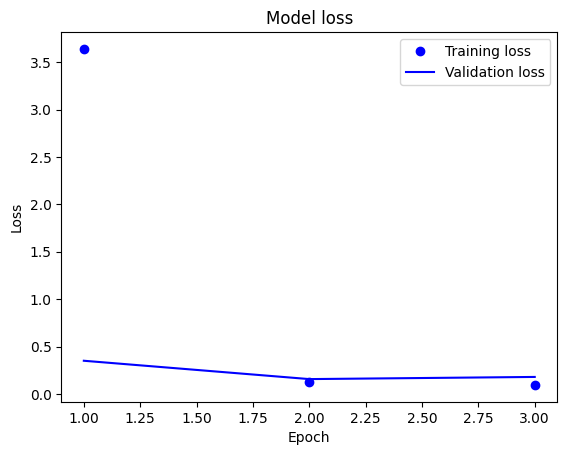

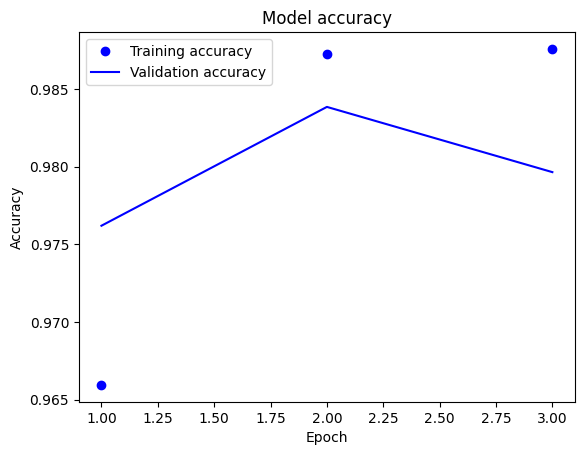

In [20]:
plot_loss_accuracy(V1Created, modelV1, 'modelV1')

In [49]:
#evaluate model
def evaluate_model(model, X_test, y_test):
    results = model.evaluate(np.array(X_test), np.array(y_test))
    y_pred = model.predict(np.array(X_test))  # Get predictions
    y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred) 

    print("Results:", results)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Confusion Matrix:\n", conf_matrix)
    
    #plot confusion matrix with numbers and labels
    fig, ax = plt.subplots()
    im = ax.imshow(conf_matrix)
    
    ax.set_xticks(np.arange(3))
    ax.set_yticks(np.arange(3))
    ax.set_xticklabels(['Low', 'Medium', 'High'])
    ax.set_yticklabels(['Low', 'Medium', 'High'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    
    for i in range(3):
        for j in range(3):
            text = ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black")
            

    ax.set_title("Confusion Matrix")
    fig.tight_layout()
    
    plt.show()

    


In [50]:
evaluate_model(modelV1, X_test, y_test)

625/625 [==============================] - 9s 14ms/step - loss: 0.1634 - accuracy: 0.9819


Next Iteration: VGG Model for comparison

In [36]:
# #VGG Only takes rgb images, so we need to load the images again in colour
# images_rgb = []
# for i in range(num_required_images):
#     print("Loading image", i)
#     img = Image.open(os.path.join(processed_folder, 'sample_' + str(i) + '.png'))
#     img = img.convert('RGB')
#     img_array = np.array(img)
#     images_rgb.append(img_array)

Loading image 0
Loading image 1
Loading image 2
Loading image 3
Loading image 4
Loading image 5
Loading image 6
Loading image 7
Loading image 8
Loading image 9
Loading image 10
Loading image 11
Loading image 12
Loading image 13
Loading image 14
Loading image 15
Loading image 16
Loading image 17
Loading image 18
Loading image 19
Loading image 20
Loading image 21
Loading image 22
Loading image 23
Loading image 24
Loading image 25
Loading image 26
Loading image 27
Loading image 28
Loading image 29
Loading image 30
Loading image 31
Loading image 32
Loading image 33
Loading image 34
Loading image 35
Loading image 36
Loading image 37
Loading image 38
Loading image 39
Loading image 40
Loading image 41
Loading image 42
Loading image 43
Loading image 44
Loading image 45
Loading image 46
Loading image 47
Loading image 48
Loading image 49
Loading image 50
Loading image 51
Loading image 52
Loading image 53
Loading image 54
Loading image 55
Loading image 56
Loading image 57
Loading image 58
Loading

In [37]:
# from keras.applications import VGG16

# #load pre-trained VGG16 model
# vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(160, 128, 3))

# #freeze the layers
# vgg16.trainable = False

# #add classification layers
# x = vgg16.output
# x = layers.Flatten()(x)
# predictions = layers.Dense(3, activation='softmax')(x)

# modelVGG16 = keras.Model(inputs=vgg16.input, outputs=predictions)

In [38]:
# #initial split of the data 80% train, 20% test
# X_train_temp_fgg, X_test_fgg, y_train_temp_fgg, y_test_fgg = train_test_split(images_rgb, labels, test_size=0.2, random_state=42)

# #further split the training data into 75% train, 25% validation
# X_train_fgg, X_val_fgg, y_train_fgg, y_val_fgg = train_test_split(X_train_temp_fgg, y_train_temp_fgg, test_size=0.25, random_state=42)

In [39]:
# #compile the model
# modelVGG16.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [40]:
# print(X_train_fgg[0].shape)

(160, 128, 3)


In [41]:
# #train the model
# modelVGG16.fit(np.array(X_train_fgg), np.array(y_train_fgg), epochs=3, batch_size=32, validation_data=(np.array(X_val_fgg), np.array(y_val_fgg)))

Epoch 1/3


2024-02-24 17:11:57.066416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 111/1875 [>.............................] - ETA: 15:54 - loss: 1.1612 - accuracy: 0.3353

KeyboardInterrupt: 